# **Logistic Regression Model**

In [1]:
# Import All Necessary Libraries (Logistic Regression)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [10]:
# Load Dataset
heart_dataset = pd.read_csv("HeartDiseaseTrain-Test.csv")

In [11]:
# Shape of Dataset
heart_dataset.shape

(1025, 14)

In [12]:
heart_dataset.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [13]:
# Check the values for each column
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [14]:
# The different Categories each Object Column has
heart_dataset.nunique()

,0
age,41
sex,2
chest_pain_type,4
resting_blood_pressure,49
cholestoral,152
fasting_blood_sugar,2
rest_ecg,3
Max_heart_rate,91
exercise_induced_angina,2
oldpeak,40


In [38]:
# Print the different values for each column
for col in heart_dataset.columns:
    print(col)
    print(heart_dataset[col].unique())

age
[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex
[0 1]
chest_pain_type
[0 1 2 3]
resting_blood_pressure
[125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
cholestoral
[212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 26

In [37]:
# Replace the Text in the Dataset with Numercical Data for the columns (Sex, chest_paint_type, fasting_blood_sugar, rest_ecg, exercise_induced_angina, slope, vessels_coloured_by_flourosopy, thalassemia)
replacements = {
    'sex': {'Male': 0, 'Female': 1},
    'chest_pain_type': {'Typical angina': 0, 'Atypical angina': 1, 'Non-anginal pain': 2, 'Asymptomatic': 3},
    'fasting_blood_sugar': {'Lower than 120 mg/ml': 0, 'Greater than 120 mg/ml': 1},
    'rest_ecg': {'Normal': 0, 'ST-T wave abnormality': 1, 'Left ventricular hypertrophy': 2},
    'exercise_induced_angina': {'No': 0, 'Yes': 1},
    'slope': {'Upsloping': 0, 'Flat': 1, 'Downsloping': 2},
    'vessels_colored_by_flourosopy': {'Zero': 0, 'One': 1, 'Two': 2, 'Three': 3, 'Four': 4},
    'thalassemia': {'No': 0, 'Fixed Defect': 1, 'Reversable Defect': 2}
}

heart_dataset.replace(replacements, inplace=True)



In [32]:
heart_dataset.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,0,0,125,212,0,1,168,0,1.0,2,2,2,0
1,53,0,0,140,203,1,0,155,1,3.1,0,0,2,0
2,70,0,0,145,174,0,1,125,1,2.6,0,0,2,0
3,61,0,0,148,203,0,1,161,0,0.0,2,1,2,0
4,62,1,0,138,294,1,1,106,0,1.9,1,3,1,0


In [33]:
heart_dataset.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.304390,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,0.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000


In [34]:
# Check for missing or null values
heart_dataset.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholestoral,0
fasting_blood_sugar,0
rest_ecg,0
Max_heart_rate,0
exercise_induced_angina,0
oldpeak,0


<Axes: >

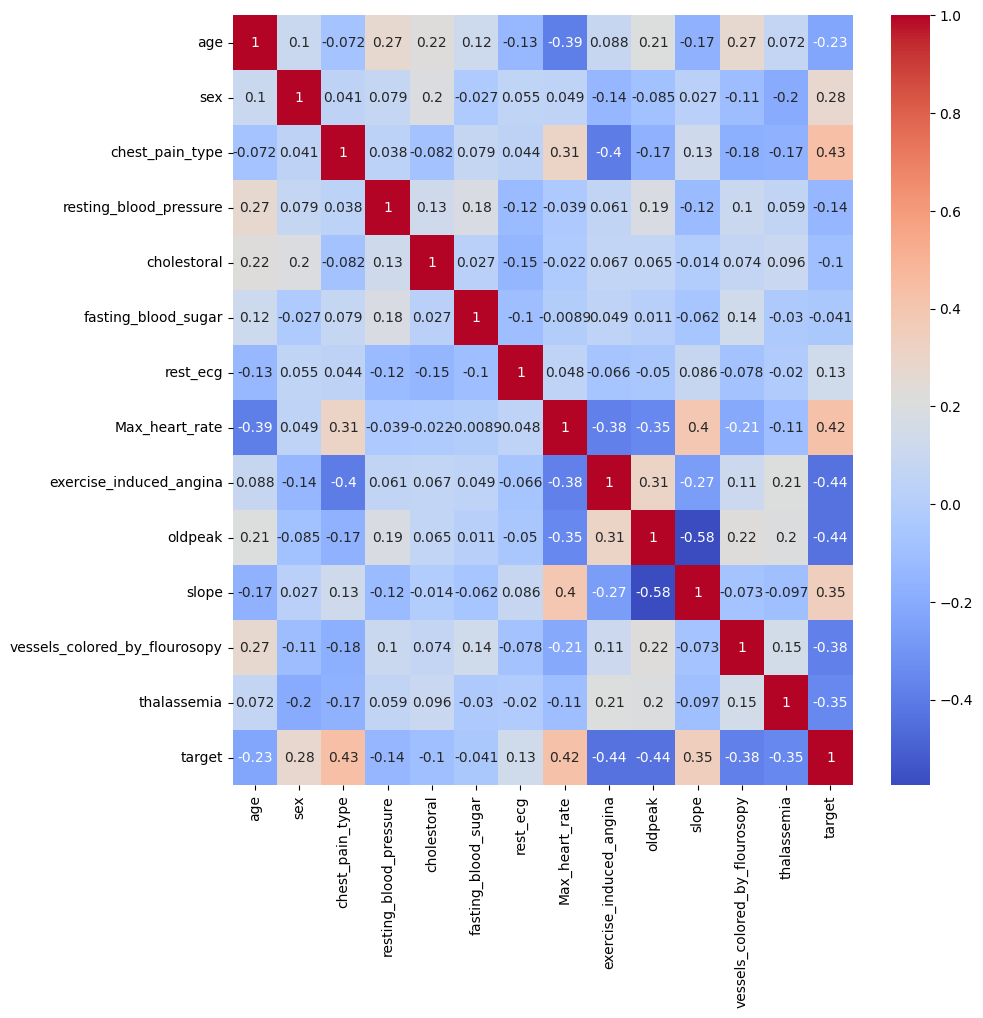

In [40]:
# Plot a correlation heatmap (Inscrease the Size )
corr_matrix = heart_dataset.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [43]:
# Seperate Target Column from the Dataset
X = heart_dataset.drop(columns='target', axis=1)
Y = heart_dataset['target']

In [44]:
# Test Train Split
X_train, X_test, Y_train, Y_test = (train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2))

In [45]:
# Model Training
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
# Model Evaluation
# Accuracy Score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8621951219512195


In [47]:
# Accuracy Score for Testing Data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8195121951219512


In [ ]:
# Predictive System